## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(" normal % share",normal_share)
print(" fraud % share",fraud_share)

 normal % share 99.82725143693798
 fraud % share 0.1727485630620034


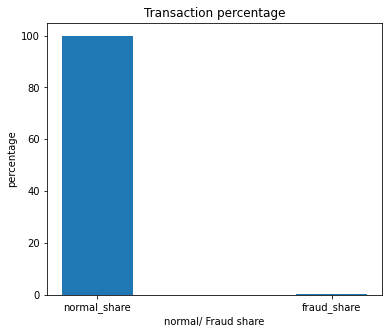

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

fig = plt.figure(figsize = (6, 5))
 
courses = ["normal_share","fraud_share"]
values = [normal_share,fraud_share]
  
    
# creating the bar plot
plt.bar(courses, values,
        width = 0.3)
 
plt.xlabel("normal/ Fraud share")
plt.ylabel("percentage")
plt.title("Transaction percentage")
plt.show()

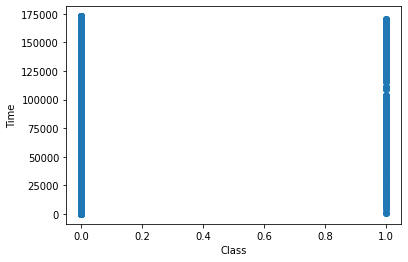

In [7]:
# Create a scatter plot to observe the distribution of classes with time

plt.scatter(df["Class"],df["Time"] )
plt.xlabel("Class")
plt.ylabel("Time")
plt.show()

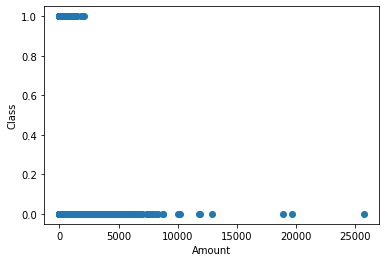

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.scatter(df["Amount"],df["Class"] )
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

In [9]:
# Drop unnecessary columns
df = df.drop("Time", axis=1)

#removing Amount
df = df.drop("Amount", axis=1)

### Splitting the data into train & test data

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

X = df.copy()
y = X.pop("Class")



In [12]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [13]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
405
87


### Plotting the distribution of a variable

In [14]:
#  sns.distplot

c:\users\rsi22\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

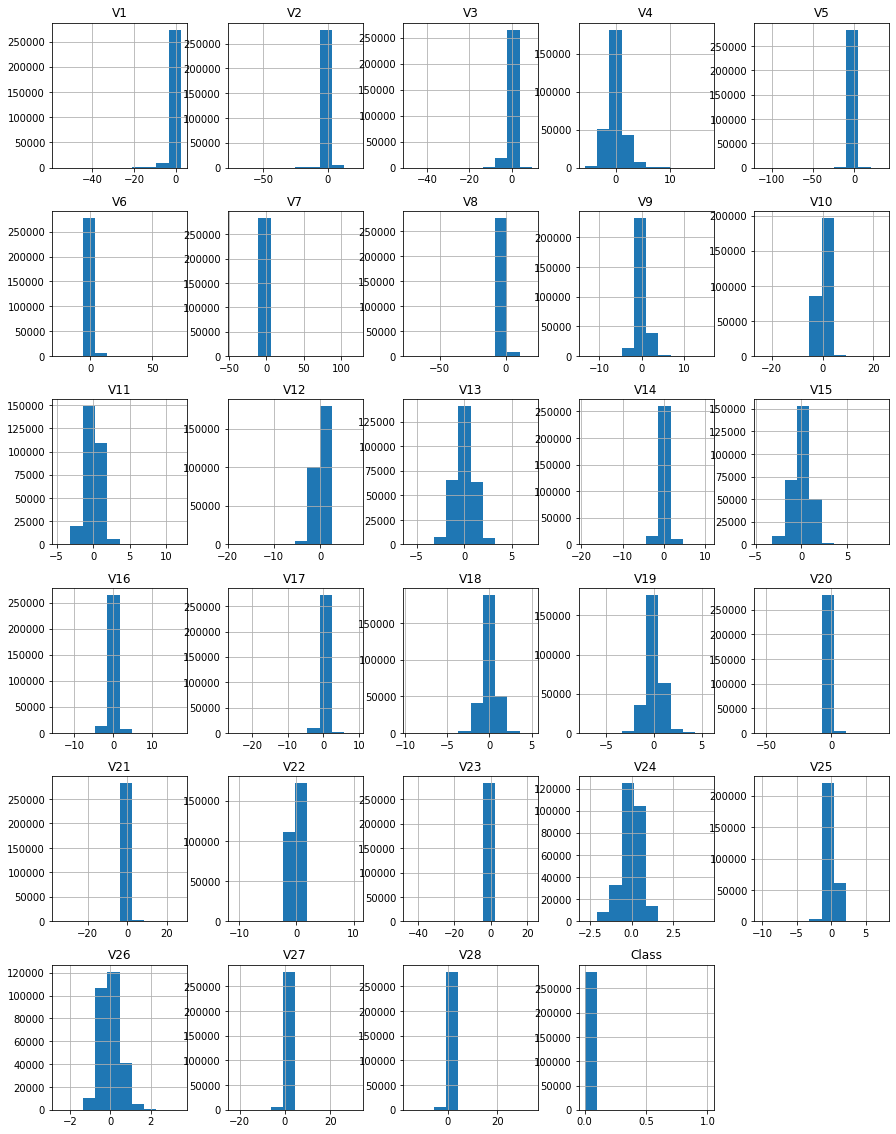

In [15]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [16]:
df.skew()

V1       -3.280667
V2       -4.624866
V3       -2.240155
V4        0.676292
V5       -2.425901
V6        1.826581
V7        2.553907
V8       -8.521944
V9        0.554680
V10       1.187141
V11       0.356506
V12      -2.278401
V13       0.065233
V14      -1.995176
V15      -0.308423
V16      -1.100966
V17      -3.844914
V18      -0.259880
V19       0.109192
V20      -2.037155
V21       3.592991
V22      -0.213258
V23      -5.875140
V24      -0.552499
V25      -0.415793
V26       0.576693
V27      -1.170209
V28      11.192091
Class    23.997579
dtype: float64

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import PowerTransformer
from pandas import DataFrame

X_old= X_train.copy()

pt = PowerTransformer(copy=False)
#pt.fit(X_train)                       ## Fit the PT on training data
X_train_a = pt.fit_transform(X_train)    ## Then apply on all data
X_test_a = pt.transform(X_test)

X_train_pt = DataFrame(X_train_a,columns=X_train.columns.tolist())
X_test_pt = DataFrame(X_test_a,columns=X_test.columns.tolist())

y_train_pt= y_train
y_test_pt= y_test
'''
pt_y = PowerTransformer()
# PowerTransformer requires a matrix/DataFrame
pt_y.fit(y_train.to_frame())
 
y_train_a = pt_y.transform(y_train.to_frame())
y_test_a = pt_y.transform(y_test.to_frame())

y_train_pt= DataFrame(y_train_a)
y_test_pt= DataFrame(y_test_a)
'''

'\npt_y = PowerTransformer()\n# PowerTransformer requires a matrix/DataFrame\npt_y.fit(y_train.to_frame())\n \ny_train_a = pt_y.transform(y_train.to_frame())\ny_test_a = pt_y.transform(y_test.to_frame())\n\ny_train_pt= DataFrame(y_train_a)\ny_test_pt= DataFrame(y_test_a)\n'

In [18]:
X_train_pt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.801232,-0.422902,-0.100330,-0.481251,-0.389935,0.094342,-0.560805,-0.128014,0.394070,0.482828,...,-0.282218,-0.609520,-0.913401,-1.762244,-0.031499,-1.426808,0.281707,1.739662,-0.252369,-0.034267
1,0.481212,-0.207834,0.838696,1.202859,-0.489885,0.581251,-0.351297,0.150793,1.017909,-0.394305,...,0.203923,-0.122479,-0.524782,-0.916722,0.067290,0.083503,0.849315,-1.121789,0.214773,0.120823
2,-0.812421,0.352739,2.092825,0.947291,0.428591,0.227213,0.192435,0.302166,-1.241198,0.087982,...,-2.508171,-0.057135,0.464018,0.942550,-0.196037,0.257386,0.031292,-0.101275,0.129658,0.323747
3,-0.691294,-0.043759,1.025300,-1.248928,0.323044,-0.007559,0.322508,0.123012,1.698562,-1.627986,...,-1.554903,-0.393391,-0.543638,-1.486458,0.028398,-1.335895,-0.603062,1.757424,-0.231580,0.243778
4,-0.282445,0.287427,0.502176,-0.306259,0.078195,0.024108,0.020170,0.145711,0.619459,-1.086362,...,-0.869390,-0.161197,0.157810,0.472374,0.287158,0.969950,-2.642359,0.396984,0.625134,0.885247


In [19]:
X_train_pt["V3"].isnull().value_counts()

False    227845
Name: V3, dtype: int64

c:\users\rsi22\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>],
       [<AxesSubplot:title={'center':'V11'}>,
        <AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>],
       [<AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>,
        <AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>],
       [<AxesSubplot:title={'center':'V21'}>,
        <AxesSubplot:title={'center':'V

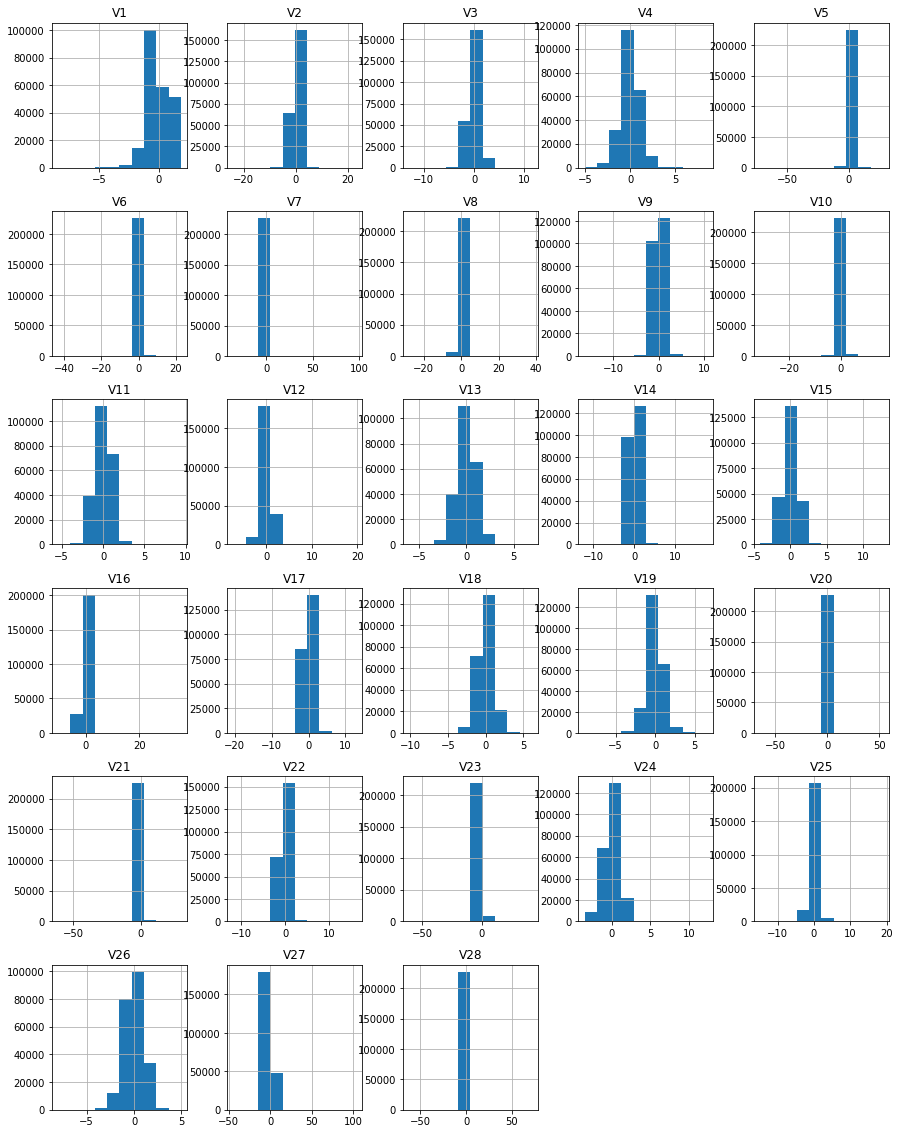

In [20]:
# plot the histogram of a variable from the dataset again to see the result 

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_train_pt.hist(ax = ax)

In [21]:
X_train_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      227845 non-null  float64
 1   V2      227845 non-null  float64
 2   V3      227845 non-null  float64
 3   V4      227845 non-null  float64
 4   V5      227845 non-null  float64
 5   V6      227845 non-null  float64
 6   V7      227845 non-null  float64
 7   V8      227845 non-null  float64
 8   V9      227845 non-null  float64
 9   V10     227845 non-null  float64
 10  V11     227845 non-null  float64
 11  V12     227845 non-null  float64
 12  V13     227845 non-null  float64
 13  V14     227845 non-null  float64
 14  V15     227845 non-null  float64
 15  V16     227845 non-null  float64
 16  V17     227845 non-null  float64
 17  V18     227845 non-null  float64
 18  V19     227845 non-null  float64
 19  V20     227845 non-null  float64
 20  V21     227845 non-null  float64
 21  V22     22

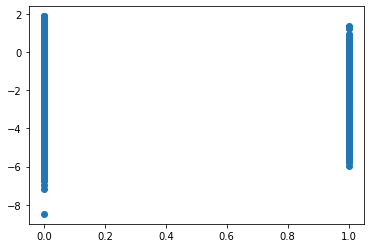

In [22]:
plt.scatter(y_train ,X_train_pt["V1"])


In [23]:
y_train.head()

13367     0
31788     0
84796     0
6243      0
162432    0
Name: Class, dtype: int64

In [24]:
X_train_pt.skew()

V1    -0.218472
V2     0.355860
V3    -0.080233
V4     0.018381
V5    -1.319323
V6    -1.919456
V7     3.011237
V8     2.290459
V9    -0.055852
V10   -1.361258
V11    0.061924
V12    0.166189
V13    0.006466
V14    0.119175
V15    0.013924
V16    0.165244
V17   -0.771115
V18   -0.060617
V19    0.016865
V20   -1.044228
V21   -2.011509
V22   -0.020020
V23   -0.314886
V24    0.112696
V25    0.082408
V26   -0.023998
V27    4.036499
V28    0.765006
dtype: float64

In [25]:
d = {'col1': X_train.skew().tolist(), 'col2': X.skew().tolist()}
df_n1 = pd.DataFrame(data=d)
df_n1

,col1,col2
0,-0.218472,-3.280667
1,0.355860,-4.624866
2,-0.080233,-2.240155
3,0.018381,0.676292
4,-1.319323,-2.425901
5,-1.919456,1.826581
6,3.011237,2.553907
7,2.290459,-8.521944
8,-0.055852,0.554680
9,-1.361258,1.187141


## Model Building
- Build different models on the imbalanced dataset and see the result

In [26]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = np.logspace(-3,3,7) #--> list of values
cv_num = 3   #--> list of values

In [27]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

def performLogisticRegression(X_train,y_train):
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    grid={"C":num_C, "penalty":["l1","l2"],"solver":['liblinear']}# l1 lasso l2 ridge

    logreg=LogisticRegression()
    logreg_cv=GridSearchCV(logreg,grid,cv=folds,n_jobs=4,pre_dispatch=7)
    logreg_cv.fit(X_train,y_train)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    print("accuracy :",logreg_cv.best_score_)
    
    return logreg_cv

In [28]:
# cv results

model_logreg = performLogisticRegression(X_train,y_train)
cv_results = pd.DataFrame(model_logreg.cv_results_)
cv_results

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9992407118874673


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.025811,0.178781,0.031310,0.019296,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.998310,0.998705,0.998179,0.998727,0.998574,0.998499,0.000218,14
1,1.639551,0.161007,0.020497,0.004769,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.998837,0.999188,0.998903,0.999254,0.999012,0.999039,0.000160,13
2,3.536173,0.452591,0.024746,0.005577,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.998947,0.999254,0.998881,0.999254,0.999100,0.999087,0.000154,12
3,3.424052,0.675929,0.041221,0.038579,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.998991,0.999342,0.999056,0.999276,0.999166,0.999166,0.000131,11
4,6.628742,0.534312,0.020208,0.001970,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.999166,0.999342,0.999100,0.999320,0.999232,0.999232,0.000091,2
5,3.164901,0.298066,0.017743,0.001470,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.999166,0.999342,0.999122,0.999298,0.999232,0.999232,0.000081,2
6,8.422054,0.706437,0.020750,0.005553,1,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.999210,0.999298,0.999144,0.999254,0.999254,0.999232,0.000052,2
7,4.019532,0.232161,0.019747,0.001163,1,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.999210,0.999320,0.999166,0.999254,0.999254,0.999241,0.000051,1
8,10.398408,1.156369,0.025496,0.003302,10,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.999210,0.999298,0.999144,0.999232,0.999254,0.999228,0.000051,5
9,4.965057,0.321050,0.022145,0.002317,10,l2,liblinear,"{'C': 10.0, 'penalty': 'l2', 'solver': 'liblin...",0.999210,0.999298,0.999144,0.999232,0.999254,0.999228,0.000051,5


In [29]:
# cv results on powerTranformer data

model_logreg_pt = performLogisticRegression(X_train_pt,y_train_pt)
cv_results_pt = pd.DataFrame(model_logreg_pt.cv_results_)
cv_results_pt

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9992407118874673


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.903850,0.023452,0.018776,0.004124,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.998310,0.998705,0.998179,0.998727,0.998574,0.998499,0.000218,14
1,1.904599,0.129990,0.023937,0.000891,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.998837,0.999188,0.998903,0.999254,0.999012,0.999039,0.000160,13
2,3.086836,0.115479,0.018949,0.003733,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.998947,0.999254,0.998881,0.999254,0.999100,0.999087,0.000154,12
3,2.080364,0.106764,0.018155,0.003050,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.998991,0.999342,0.999056,0.999276,0.999166,0.999166,0.000131,11
4,6.922741,0.666279,0.021940,0.001412,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.999166,0.999342,0.999100,0.999320,0.999232,0.999232,0.000091,2
5,3.415280,0.457775,0.019620,0.002741,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.999166,0.999342,0.999122,0.999298,0.999232,0.999232,0.000081,2
6,8.109757,0.941885,0.021102,0.001979,1,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.999210,0.999298,0.999144,0.999254,0.999254,0.999232,0.000052,2
7,4.065578,0.249010,0.021679,0.002681,1,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.999210,0.999320,0.999166,0.999254,0.999254,0.999241,0.000051,1
8,10.583916,1.058645,0.032562,0.020180,10,l1,liblinear,"{'C': 10.0, 'penalty': 'l1', 'solver': 'liblin...",0.999210,0.999298,0.999144,0.999232,0.999254,0.999228,0.000051,5
9,5.421435,0.893726,0.023096,0.003238,10,l2,liblinear,"{'C': 10.0, 'penalty': 'l2', 'solver': 'liblin...",0.999210,0.999298,0.999144,0.999232,0.999254,0.999228,0.000051,5


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [30]:
#predictions
y_test_cv = model_logreg_pt.predict(X_test) 

In [31]:
#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_test_cv))
print("Precision Logit:",metrics.precision_score(y_test, y_test_cv))
print("Recall Logit:",metrics.recall_score(y_test, y_test_cv))
print("F1 Score Logit:",metrics.f1_score(y_test, y_test_cv))

Accuracy Logit: 0.9992099996488887
Precision Logit: 0.8620689655172413
Recall Logit: 0.5747126436781609
F1 Score Logit: 0.689655172413793


In [32]:
# roc-auc curve confusion matrix

In [33]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

** Decision Tree**

In [34]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def performDecisionTreeClassifier(X_train,y_train):
    # Setup the parameters and distributions to sample from: param_dist
    param_dist = {"max_depth": [3, None],
                  "max_features": randint(1, 9),
                  "min_samples_leaf": randint(1, 9),
                  "criterion": ["gini", "entropy"]}

    # Instantiate a Decision Tree classifier: tree
    tree = DecisionTreeClassifier()

    # Instantiate the RandomizedSearchCV object: tree_cv
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

    # Fit it to the data
    tree_cv.fit(X_train,y_train)

    # Print the tuned parameters and score
    print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
    print("Best score is {}".format(tree_cv.best_score_))
    
    return tree_cv

In [35]:
model_dt_pt = performDecisionTreeClassifier(X_train_pt,y_train_pt)
cv_results_dt_pt = pd.DataFrame(model_dt_pt.cv_results_)
cv_results_dt_pt

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5}
Best score is 0.9993767692949154


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.329065,0.011918,0.009576,0.000486,gini,3,3,1,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.998661,0.999056,0.999298,0.999166,0.998991,0.999034,0.000214,10
1,0.886641,0.048279,0.009772,0.000747,entropy,3,6,2,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.999188,0.999429,0.999078,0.999451,0.999078,0.999245,0.000165,4
2,0.944874,0.014855,0.010976,0.000015,gini,3,8,7,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.998793,0.999210,0.999364,0.999298,0.999144,0.999162,0.000199,6
3,0.646674,0.026412,0.013768,0.000755,entropy,None,1,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.999166,0.999210,0.999298,0.998859,0.998815,0.999070,0.000195,9
4,0.685272,0.018383,0.010372,0.000799,entropy,3,4,6,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.999232,0.999342,0.999188,0.999298,0.998903,0.999192,0.000154,5
5,3.264868,0.616487,0.013366,0.000489,gini,None,5,5,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.999342,0.999342,0.999561,0.999386,0.999254,0.999377,0.000102,1
6,2.175293,0.083126,0.011388,0.000473,entropy,None,5,7,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.999298,0.999232,0.999517,0.999407,0.999342,0.999359,0.000098,2
7,0.717082,0.012084,0.009606,0.000489,entropy,3,5,1,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.998969,0.999364,0.998661,0.999320,0.999122,0.999087,0.000256,8
8,2.316290,0.296240,0.015770,0.003354,gini,None,4,5,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.999276,0.999386,0.999561,0.999254,0.999254,0.999346,0.000118,3
9,0.694004,0.039702,0.010885,0.001017,entropy,3,4,8,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.999056,0.999320,0.999386,0.999210,0.998815,0.999157,0.000204,7


**Random Forest**

In [59]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

def performRandomForestClassifier(X_train,y_train):
    # Running the random forest with default parameters.
    rfc = RandomForestClassifier()
    
    # Create the parameter grid based on the results of random search 
    param_grid = {
        'max_depth': [4,8,10],
        'min_samples_leaf': range(100, 400, 200),
        'min_samples_split': range(200, 500, 200),
        'n_estimators': [100,200, 300], 
        'max_features': [5, 10]
    }
    # Create a based model
    rf = RandomForestClassifier()
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = 4,verbose = 2)
    
    # Fit the grid search to the data
    grid_search.fit(X_train,y_train)
    
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)
    
    return grid_search

In [60]:
grid_search = performRandomForestClassifier(X_train_pt,y_train_pt)

# Fit the grid search to the data
grid_search.fit(X_train_pt,y_train_pt)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
We can get accuracy of 0.9991397661653189 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}
Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

**XGBoost**

In [38]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

In [56]:
from sklearn.model_selection import RandomizedSearchCV

def performXGBClassifier(X_train,y_train):

    # creating a KFold object 
    folds = 3

    # specify range of hyperparameters
    param_grid = {'max_depth': [2,4,8],
                  'learning_rate': [0.1, 0.3], 
                 'subsample': [0.2, 0.4, 0.6, 0.9]}          


    # specify model
    xgb_model = XGBClassifier()
        

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = xgb_model, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = folds, 
                            verbose = 2,
                            n_jobs=7,
                            return_train_score=True)   
    
    # fit the model
    model_cv.fit(X_train, y_train) 
    
    return model_cv

In [57]:
model_cv_xgb = performXGBClassifier(X_train_pt,y_train_pt)
# cv results
cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
cv_results_xgb

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\users\rsi22\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,59.075625,0.007313,0.535568,0.003258,0.1,2,0.2,"{'learning_rate': 0.1, 'max_depth': 2, 'subsam...",0.977847,0.972701,0.976889,0.975812,0.002234,11,0.991964,0.991086,0.990707,0.991253,5.262577e-04
1,66.021059,0.173435,0.481047,0.051767,0.1,2,0.4,"{'learning_rate': 0.1, 'max_depth': 2, 'subsam...",0.975011,0.973234,0.975696,0.974647,0.001038,16,0.994194,0.990913,0.993167,0.992758,1.370527e-03
2,77.442551,4.729742,0.480049,0.045612,0.1,2,0.6,"{'learning_rate': 0.1, 'max_depth': 2, 'subsam...",0.982177,0.979960,0.981331,0.981156,0.000913,1,0.994032,0.992286,0.994190,0.993503,8.626143e-04
3,86.201640,0.752412,0.458108,0.039970,0.1,2,0.9,"{'learning_rate': 0.1, 'max_depth': 2, 'subsam...",0.979425,0.976045,0.982161,0.979210,0.002502,3,0.993085,0.992036,0.993978,0.993033,7.935839e-04
4,107.226745,3.779478,0.499954,0.047943,0.1,4,0.2,"{'learning_rate': 0.1, 'max_depth': 4, 'subsam...",0.974865,0.973408,0.973757,0.974010,0.000621,18,0.996583,0.997613,0.998075,0.997424,6.234052e-04
5,127.503517,1.080669,0.519610,0.049393,0.1,4,0.4,"{'learning_rate': 0.1, 'max_depth': 4, 'subsam...",0.977948,0.975935,0.974231,0.976038,0.001519,10,0.999549,0.999241,0.999408,0.999399,1.256912e-04
6,146.109391,4.332932,0.469743,0.009391,0.1,4,0.6,"{'learning_rate': 0.1, 'max_depth': 4, 'subsam...",0.975257,0.977943,0.980136,0.977779,0.001995,5,0.999444,0.999673,0.999734,0.999617,1.247386e-04
7,157.221509,0.932718,0.470410,0.039559,0.1,4,0.9,"{'learning_rate': 0.1, 'max_depth': 4, 'subsam...",0.971806,0.982806,0.974601,0.976404,0.004668,9,0.999548,0.999754,0.999784,0.999695,1.051147e-04
8,128.250833,4.288737,0.467748,0.058331,0.1,8,0.2,"{'learning_rate': 0.1, 'max_depth': 8, 'subsam...",0.973427,0.974015,0.975185,0.974209,0.000731,17,0.997469,0.997791,0.998402,0.997887,3.866696e-04
9,175.506140,4.774068,0.541883,0.024023,0.1,8,0.4,"{'learning_rate': 0.1, 'max_depth': 8, 'subsam...",0.984569,0.970891,0.974590,0.976683,0.005777,8,0.999717,0.999702,0.999746,0.999722,1.797464e-05


c:\users\rsi22\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


KeyError: 'param_learning_rate'

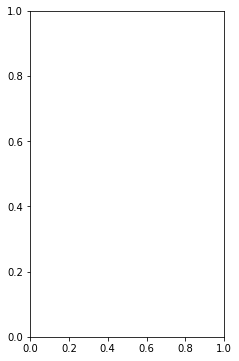

In [58]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1, 0.3], 
             'subsample': [0.2, 0.4, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df_xg = cv_results[cv_results_xgb['param_subsample']==subsample]

    plt.plot(df_xg["param_learning_rate"], df_xg["mean_test_score"])
    plt.plot(df_xg["param_learning_rate"], df_xg["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

In [ ]:
# k-fold CV (using all the 13 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train_pt, y_train_pt, scoring='r2', cv=5)
scores      

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

oversample = over_sampling.RandomOverSampler(sampling_strategy='minority')
?oversample
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


In [ ]:

# example of random oversampling to balance the class distribution
from collections import Counter

# define oversampling strategy
oversample = over_sampling.RandomOverSampler(sampling_strategy='minority')

...
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_over))

In [ ]:
help(over_sampling)

In [ ]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler


# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]

pipeline = Pipeline(steps=steps)

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=cv, n_jobs=-1)

score = mean(scores)
print('F1 Score: %.3f' % score)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)